**Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**
  - Anomaly Detection : Anomaly Detection is a machine learning technique used to identify data points, patterns, or observations that deviate significantly from normal behavior in a dataset. These unusual observations are called anomalies or outliers and often indicate errors, fraud, faults, or rare events. It is widely used in fraud detection, network security, medical diagnosis, manufacturing fault detection, and system monitoring.
  - types of anomly detection
    - point anomalies : a point anomaly is a single data instance that is signicantly different from the rest of the data
    - example :
      - in a credit card transaction datasets, most transcation are between rs100 and rs10000
      - a single transaction of 500000 is a point anomly
   - Contextual Anomalies : A contextual anomaly is abnormal only in a specific context, such as time, location, or condition, but may be normal otherwise.
   - example
     - a temperature of 35c ; normal in summer - not an anomaly, abnormal in winter - Anomly
  - Collective Anomalies : A collective anomaly occurs when a group of related data points together is anomalous, even if individual points appear normal.
  - example
    - a sudden sequence of small withrwal from an ATM in a short time
    - each withrawal looks normal, but together they indicate fraud
    

**Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.**
  - isolation Forest
    - it uses random feature selection and random splits
    - it isolated anomalies instead of prfiling normal data
    - it mainly detect global anomalies
    - it does not depend on distance or density
    - it works well with high-dimensional data
    - scalability is high, suitable for large datasets
    - Commonly used in fraud detection and intrusion detection
  - DBSCAN
    - it is a density-based clustering algorithm
    - it groups points based on ε (epsilon) and MinPts
    - points in low-density regions are treated as anomalies
    -  it detects density-based anomalies
    - it can find clusters of arbitrary shapes
    - scalability is medium
    - sensitive to parameter selection and feature scaling
    - best suited for spatial and low-dimensional data
  - Local Outlier Factor (LOF)
    - It compares local density of a point with its neighbors
    - It identifies local anomalies
    - It works well with varying data densities
    - It is based on k-nearest neighbors
    - Sensitive to noise and feature scaling
    - Scalability is low to medium
    - Effective for small to medium datasets
    - Used in network traffic and behavioral analysis

**Question 3: What are the key components of a Time Series? Explain each with one example.**
 - A time series is a sequence of data points collected or recorded at regular time intervals (daily, monthly, yearly, etc.). Time series data is commonly used in sales forecasting, weather prediction, stock market analysis, and demand forecasting.
  - Trend (T)
    - represents the long-term direction of the data over time.
    - shows whether the data is increasing, decreasing, or stable.
    - example : A company yearly sales increasing steadily over 10 years indicates an upward trend.
  - Seasonality (S)
    - refers to regular and repeating patterns occurring at fixed intervals.
    - caused by seasonal factors like weather, festivals, or holidays.
    - Example:Ice cream sales increase every summer and decrease in winter.
  - Cyclical Component (C)
    - Represents long-term fluctuations that occur over irregular periods.
    - Often influenced by economic or business cycles.
    - Example:Economic growth and recession cycles affecting employment rates.
  - Irregular / Random Component (I)
    - Captures unpredictable and random variations in the data.
    - Caused by unexpected events.
    - Example:A sudden drop in airline bookings due to a natural disaster.

**Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?**
   - A time series is said to be stationary if its statistical properties remain constant over time. Stationarity is an important assumption for many time series models because it makes the series predictable and easier to model.
   - Transforming a Non-Stationary Series into a Stationary Series
      - differncing
          - Subtracts the previous observation from the current one
          - Removes trend
          - example : Y't = Yt - Yt-1
      - Log or Power Transformation
         - Stabilizes variance
         - Useful when variance increases over time
         - example : Yt = log(yt)

      - Deternding
        - Removing trend regression or moving averages
        - example : removing linear trend from stock price data
      - seasonal Difference
         - remove seasonal effects
         - example : monthly data difference by 12 periods

**Question 5: Differentiate between AR, MA,ARIMA, SARIMA, and SARIMAX models in terms of structure and application.**
   - AR(AutoRegressive) Model
     - strucutre
       - the current value depends on its own past values
       - denoted as AR(p) where p is the number of lag observation
     - application
       - Used when data shows strong correlation with past values.
       - suitable for stationary time series without trend or seasonality.
   - MA(Moving Average) Model
      - structure
        - The current value depends on past error terms.
        - enoted as MA(q), where q is the number of lagged forecast errors.
      - application
        - used to model random shocks or noise.
        - Suitable for stationary time series.
   - ARIMA (AutoRegressive Integrated Moving Average)
     - structure
        - combine AR + I + MA
        - Dinoted as ARIMA (p,d,q):
        - where p: AR order, d: differencing order, q:MA order
     - application
        - used for non-statinary data after differencing
        - no seansonality handling
     - example : Monthly sales forecasting
   - SARIMA (Seasonal ARIMA)
    - structure
      - Extends ARIMA to include seasonal components.
      - Denoted as SARIMA(p, d, q)(P, D, Q)s:(P,D,Q) > seasonal orders, s> seasonal period
   - application
      - suitable for data with trend and seasonality
   - example : Electricity demand with yearly seasonality.
   - SARIMAX (Seasonal ARIMA with eXogenous Variables)
      - Structure
         - SARIMA + external (exogenous) variables.
         - Includes independent predictors affecting the time series.Yt =RIMA+βXt+εt
     - Application
        - Used when external factors influence the series.
     - Example: Sales forecasting using advertising spend and promotions.


In [ ]:
'''Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components'''

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

data.rename(columns={'#Passengers':'Passengers'}, inplace=True)

In [ ]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


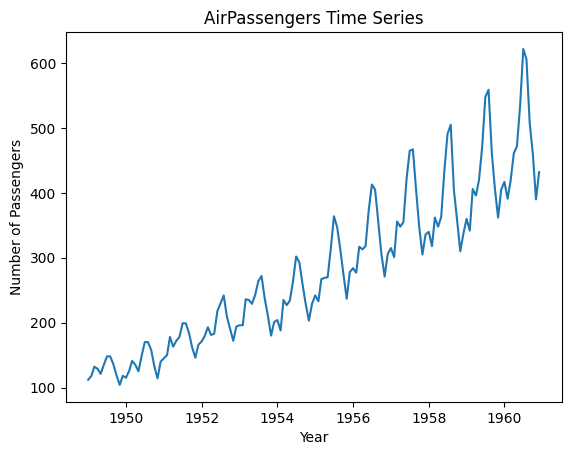

In [ ]:
plt.figure()
plt.plot(data['Passengers'])
plt.title("AirPassengers Time Series")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()


In [ ]:
decomposition = seasonal_decompose(
    data['Passengers'],
    model='multiplicative',
    period=12
)


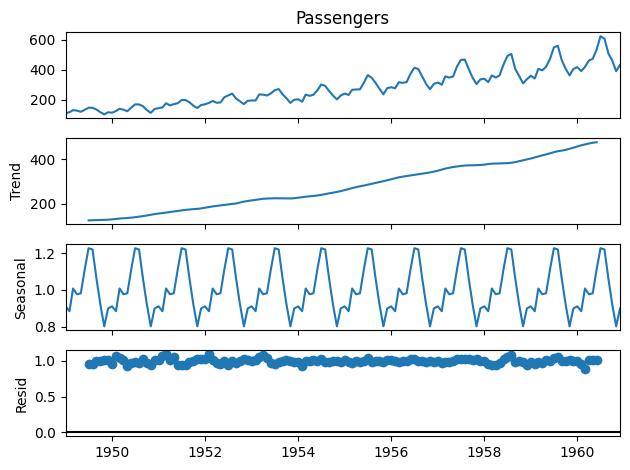

In [ ]:
decomposition.plot()
plt.show()


In [ ]:
'''Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('NYC_taxi_fare_data.csv', on_bad_lines='skip')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [ ]:
X = df[['trip_distance', 'fare_amount']]

In [ ]:
#  Apply Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

df['Anomaly'] = iso_forest.fit_predict(X)

In [ ]:
#  Separate normal data and anomalies
normal = df[df['Anomaly'] == 1]
anomalies = df[df['Anomaly'] == -1]

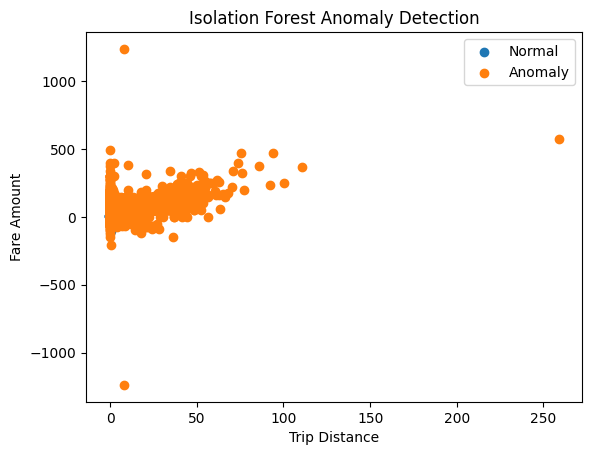

In [ ]:
#  Visualize anomalies on a 2D scatter plot
plt.figure()
plt.scatter(normal['trip_distance'], normal['fare_amount'], label='Normal')
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], label='Anomaly')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()

In [ ]:
'''Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.'''


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("AirPassengers.csv")

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

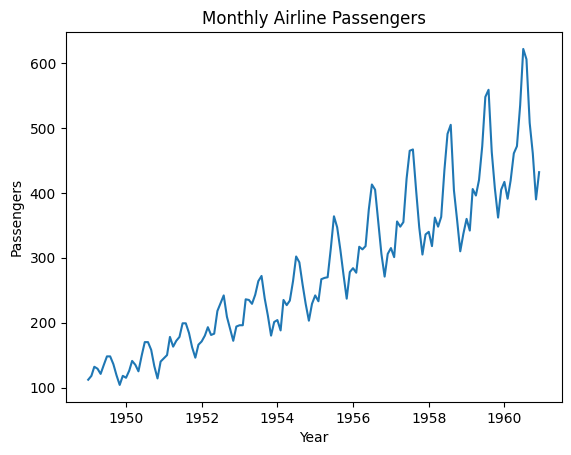

In [ ]:
plt.figure()
plt.plot(df['Passengers'])
plt.title("Monthly Airline Passengers")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

In [ ]:
# Train the SARIMA Model

model = SARIMAX(
    df['Passengers'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)

model_fit = model.fit(disp=False)

In [ ]:
# Forecast the Next 12 Months

forecast = model_fit.forecast(steps=12)

forecast_index = pd.date_range(
    start=data.index[-1] + pd.offsets.MonthBegin(),
    periods=12,
    freq='MS'
)

forecast = pd.Series(forecast, index=forecast_index)


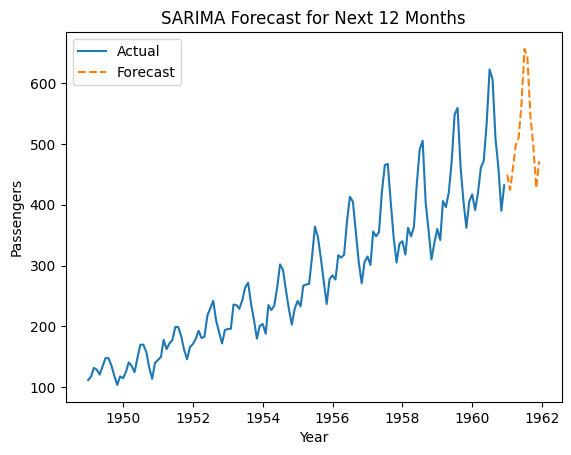

In [ ]:
# Visualize Actual vs Forecasted Values

plt.figure()
plt.plot(data['Passengers'], label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [ ]:
'''Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.'''


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
df = pd.read_csv('NYC_taxi_fare_data.csv', on_bad_lines='skip')

In [ ]:
# Select numerical features for LOF

X = df[['trip_distance', 'fare_amount']]

In [ ]:
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')

In [ ]:
df = df.dropna(subset=['trip_distance', 'fare_amount'])

In [ ]:
print(df.isna().sum())
print(df.dtypes)


trip_distance    0
fare_amount      0
dtype: int64
trip_distance    float64
fare_amount      float64
dtype: object


In [ ]:

#  Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.05
)

df['Anomaly'] = lof.fit_predict(X)


In [ ]:
#Separate normal points and anomalies
normal = df[df['Anomaly'] == 1]
anomalies = df[df['Anomaly'] == -1]


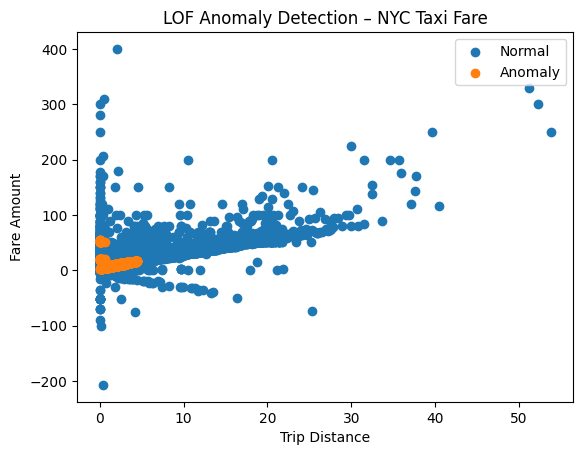

In [ ]:
normal = df[df['Anomaly'] == 1]
anomalies = df[df['Anomaly'] == -1]

plt.figure()
plt.scatter(normal['trip_distance'], normal['fare_amount'], label='Normal')
plt.scatter(anomalies['trip_distance'], anomalies['fare_amount'], label='Anomaly')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('LOF Anomaly Detection – NYC Taxi Fare')
plt.legend()
plt.show()


In [ ]:
'''Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations? '''


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Create timestamps (30 days, 15-minute interval)
timestamps = pd.date_range(start='2024-01-01', periods=30*96, freq='15T')

np.random.seed(42)

energy_usage = 200 + 20*np.sin(np.arange(len(timestamps))/96*2*np.pi) + np.random.normal(0,5,len(timestamps))
temperature = 25 + 5*np.sin(np.arange(len(timestamps))/96*2*np.pi)
humidity = 60 + np.random.normal(0,5,len(timestamps))

df = pd.DataFrame({
    'timestamp': timestamps,
    'energy_usage': energy_usage,
    'temperature': temperature,
    'humidity': humidity
})

df.set_index('timestamp', inplace=True)

In [ ]:
# we make anomly accordingly
df.iloc[300:310, df.columns.get_loc('energy_usage')] += 80
df.iloc[900:910, df.columns.get_loc('energy_usage')] -= 70

In [ ]:
# Anomaly detiction (isolation Forest)
X = df[['energy_usage', 'temperature', 'humidity']]

iso = IsolationForest(contamination=0.03, random_state=42)
df['Anomaly'] = iso.fit_predict(X)

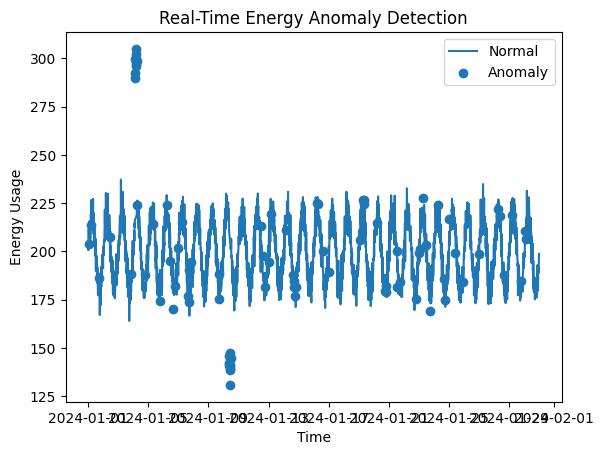

In [ ]:
# Visualize Anomalies
normal = df[df['Anomaly'] == 1]
anomalies = df[df['Anomaly'] == -1]

plt.figure()
plt.plot(normal.index, normal['energy_usage'], label='Normal')
plt.scatter(anomalies.index, anomalies['energy_usage'], label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Energy Usage')
plt.title('Real-Time Energy Anomaly Detection')
plt.legend()
plt.show()